In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and di

In [2]:
from bs4 import BeautifulSoup as bs
import lxml
import requests

In [ ]:
final=[]
for i in range(1,146):
  url=f"http://www.greenproduct.kr/Mall/producta.asp?page={i}&VT=A&ECOL=&ECOM=&LNUM=10&VCNM=&REGN=&ORD=&SM=&SW="
  res=requests.get(url)
  soup=bs(res.text,"lxml")
  y=[]
  for link in soup.find_all('span'):
    y.append(link.text.strip())
  for x in range(53, len(y),8):
    final.append(y[x])

print(final)

['(주)경기도장애인기업', '(주)경기도장애인기업', '(사)한국지체장애인협회(춘천시장애인근로사업장)', '(사)한국지체장애인협회(춘천시장애인근로사업장)', '(사)한국지체장애인협회(춘천시장애인근로사업장)', '(사)한국지체장애인협회(춘천시장애인근로사업장)', '(주)맑은기업', '(주)노루페인트', '(사)한국지체장애인협회(춘천시장애인근로사업장)', '(주)엘에스케이화인텍스']


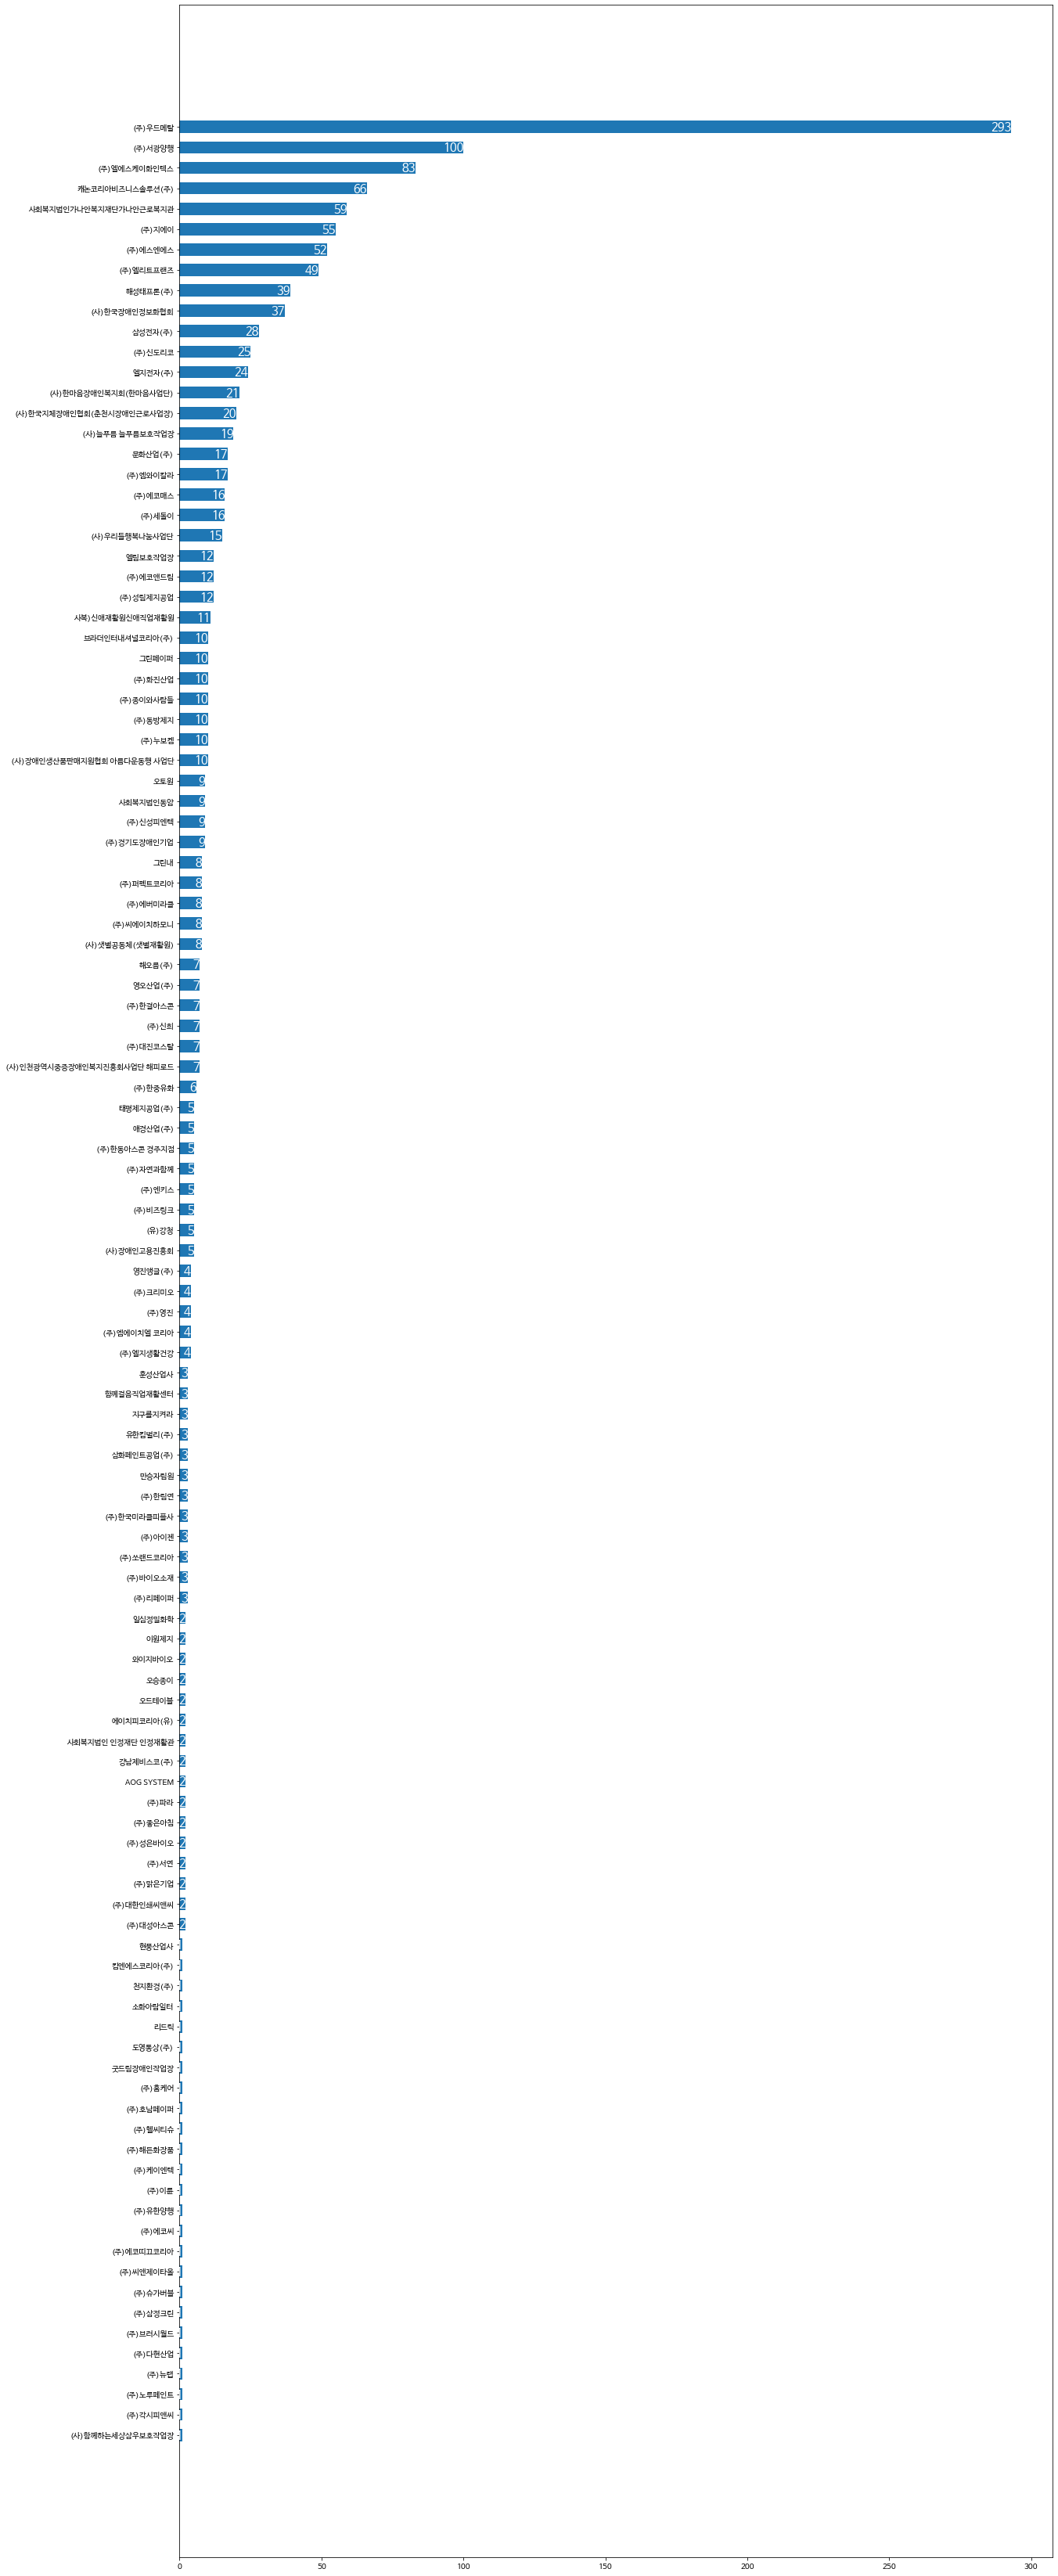

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import platform
import numpy as np

plt.rc('font', family='NanumBarunGothic')

count={}
for i in final:
    try: count[i] += 1
    except: count[i]=1

def sort_key(x):
  return x[1]

myList = count.items()
myList = sorted(myList)
myList.sort(key=sort_key)
x, y = zip(*myList) 
z=np.arange(len(y))

plt.figure(figsize=(20,60))
bar=plt.barh(z, y, height=0.6)
plt.yticks(z,x)
plt.rc('axes', labelsize=30)

for i in range(len(y)):
  plt.text(y[i], i , y[i], ha='right', va='center', fontsize = 15, color='w')

plt.show()

In [ ]:
import urllib.request
headers = {'User-Agent':'Chrome/66.0.3359.181'}
finals=[]
xx=[]
for i in range(1,13):
  url=f"http://onlyeco.co.kr/product/list.html?cate_no=68&page={i}"
  req = urllib.request.Request(url)
  sourcecode = urllib.request.urlopen(url).read()
  soup = bs(sourcecode, "html.parser")
  for j in soup.find_all("div", {"class":"prdImg"}):
    xx.append(j.a["href"])
  for k in xx:
    urls="http://onlyeco.co.kr"+k
    ress=requests.get(urls,headers=headers)
    soups=bs(ress.text,"lxml")
    y=[]
    for l in soups.find_all("tr",{"rel": "제조사"}):
      for nn in l.select_one('td'):
          y.append(nn.text)
    finals.extend(y)

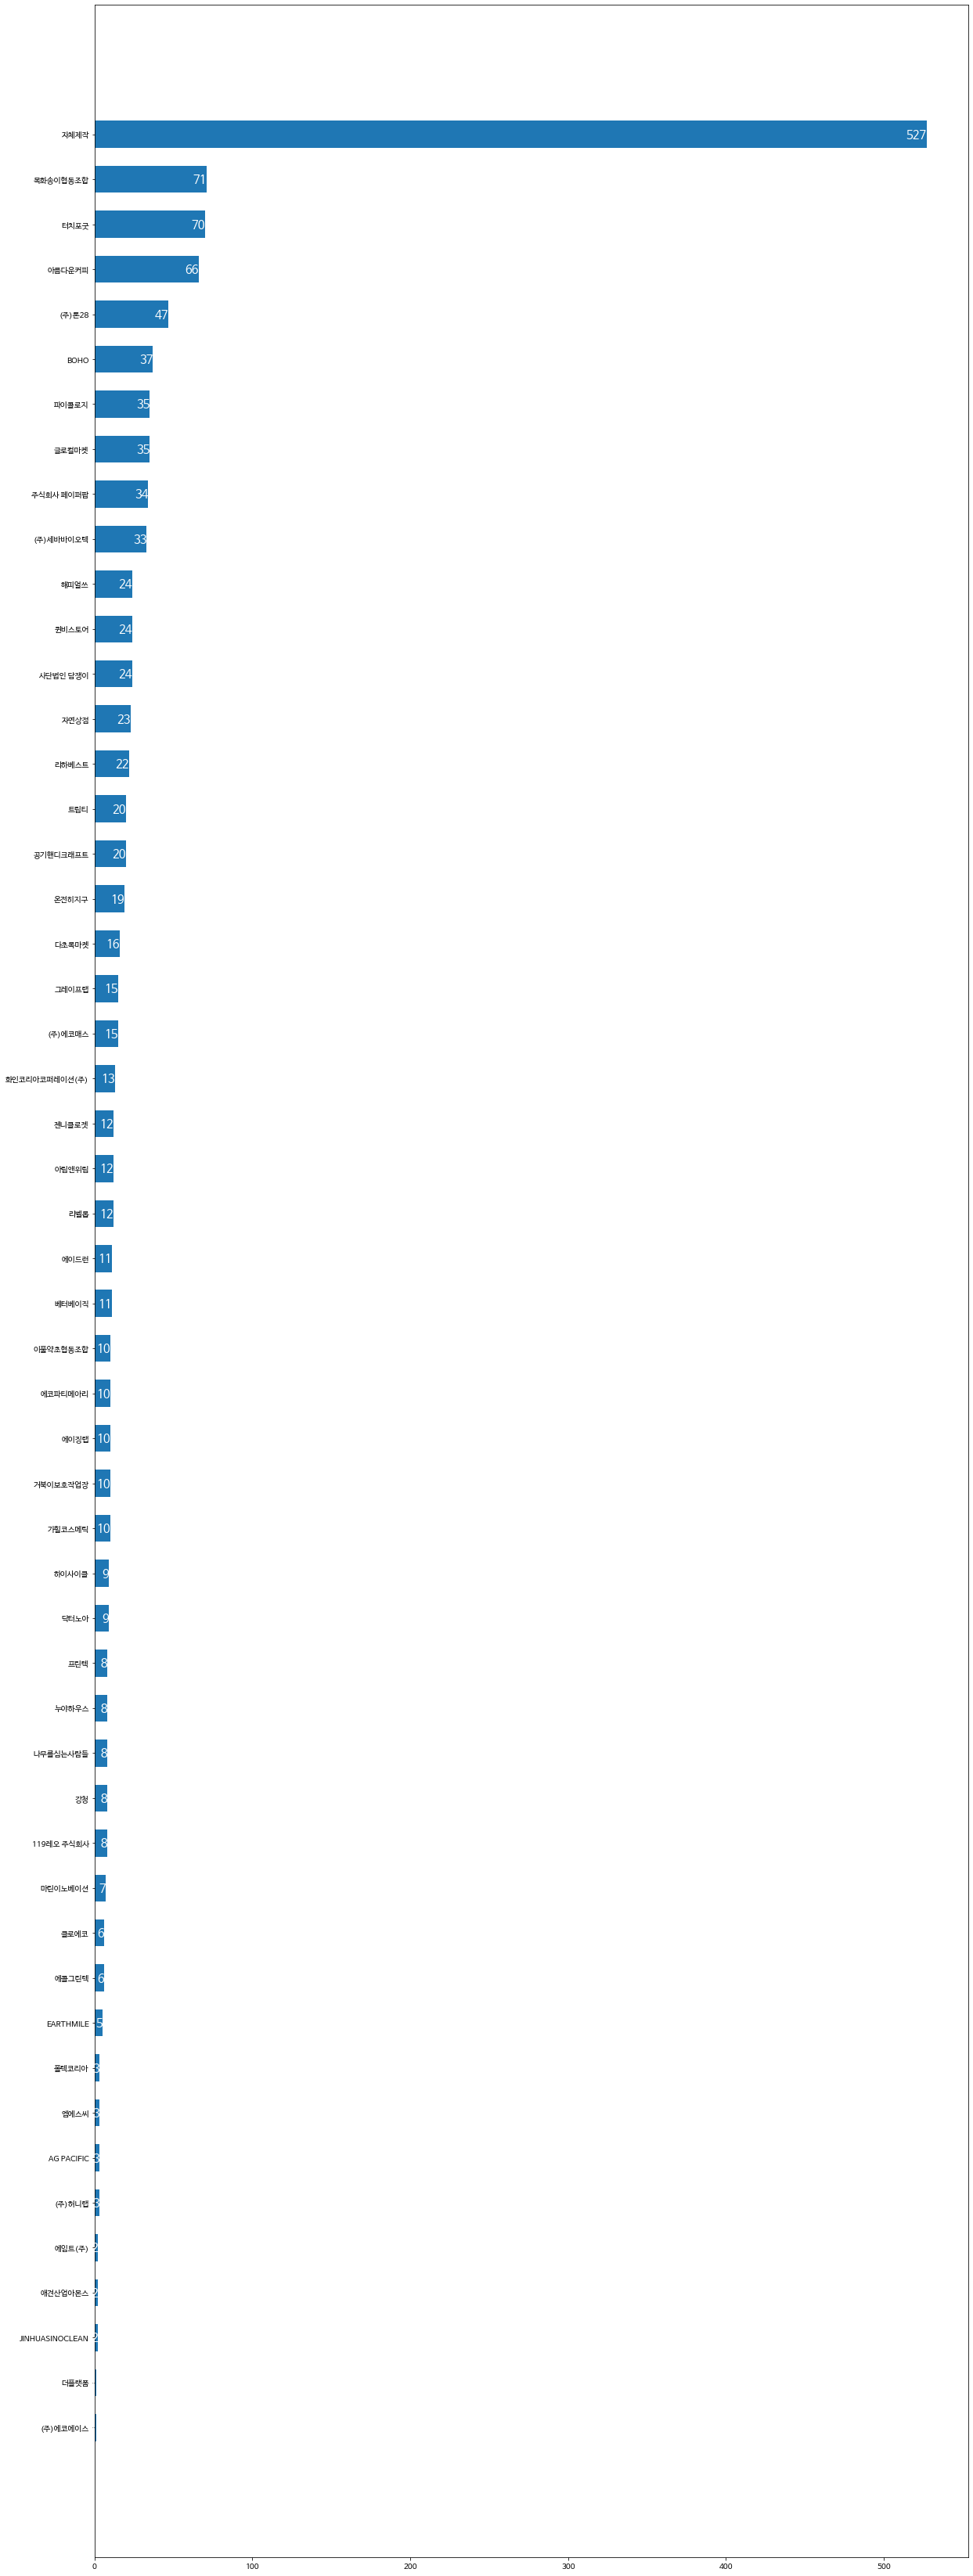

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import platform
import numpy as np

plt.rc('font', family='NanumBarunGothic')

count={}
for i in finals:
    try: count[i] += 1
    except: count[i]=1

def sort_key(x):
  return x[1]

myList = count.items()
myList = sorted(myList)
myList.sort(key=sort_key)
x, y = zip(*myList) 
z=np.arange(len(y))

plt.figure(figsize=(20,60))
bar=plt.barh(z, y, height=0.6)
plt.yticks(z,x)
plt.rc('axes', labelsize=30)

for i in range(len(y)):
  plt.text(y[i], i , y[i], ha='right', va='center', fontsize = 15, color='w')

plt.show()

In [ ]:
import urllib.request
#headers = {'User-Agent':'Chrome/66.0.3359.181'}
finals=[]
xx=[]
url=f"https://search.shopping.naver.com/allmall"
req = urllib.request.Request(url)
sourcecode = urllib.request.urlopen(url).read()
soup = bs(sourcecode, "html.parser")
for j in soup.find_all("li", {"class":"mallListItem_item_mall__3yVIl"}):
  for k in j.find_all("div",{"class":"mallListItem_title_area__2bQvU"}):
    xx.append(k.select_one("strong").text)
print(xx)

['G마켓', '11번가', '옥션', '인터파크', '쿠팡', '위메프', '롯데ON', '최저가 마켓', 'SSG닷컴', '티몬', '아마존몰', '대한민국1번가', '롯데홈쇼핑', '하이마트쇼핑몰', 'G9', '이지플러스샵', '신세계몰', '하프클럽', '락티브', 'GSSHOP', '현대Hmall', '블루스카이쇼핑', '이마트몰', 'jiwoomall']


In [4]:
pip install selenium

     |████████████████████████████████| 968 kB 8.9 MB/s 
     |████████████████████████████████| 359 kB 56.5 MB/s 
     |████████████████████████████████| 138 kB 56.5 MB/s 
     |████████████████████████████████| 3.6 MB 56.7 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import selenium
from selenium import webdriver
from selenium.webdriver import ActionChains

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

In [ ]:
URL = 'https://www.oliveyoung.co.kr/store/display/getBrandShopDetail.do?onlBrndCd=A001306'

driver = webdriver.Chrome(executable_path='chromedriver')
driver.get(url=URL)

WebDriverException: ignored

In [32]:
final=[]
for i in range(0,12):
  url=f"https://www.oliveyoung.co.kr/store/search/getSearchMain.do?startCount={i*24}&sort=RNK%2FDESC&goods_sort=WEIGHT%2FDESC%2CRNK%2FDESC&collection=ALL&realQuery=%EB%B9%84%EA%B1%B4&reQuery=&viewtype=image&category=&catename=LCTG_ID&catedepth=1&rt=&setMinPrice=&setMaxPrice=&listnum=24&tmp_requery=&tmp_requery2=&categoryDepthValue=&cateId=&cateId2=&BenefitAll_CHECK=&query=%EB%B9%84%EA%B1%B4&selectCateNm=%EC%A0%84%EC%B2%B4&firstTotalCount=241&typeChk=thum&branChk=&brandTop=&attrChk=&attrTop=&onlyOneBrand=&quickYn=N&cateChk=&benefitChk=&attrCheck0=&attrCheck1=&attrCheck2=&attrCheck3=&attrCheck4=&brandChkList=&benefitChkList=&_displayImgUploadUrl=https%3A%2F%2Fimage.oliveyoung.co.kr%2Fuploads%2Fimages%2Fdisplay%2F&sale_below_price=&sale_over_price="
  res=requests.get(url)
  soup=bs(res.text,"lxml")
  mydivs=soup.find_all("ul", {'id':'w_cate_prd_list'})
  for x in mydivs:
    final.append(x.text.strip())
  #for x in range(53, len(y),8):
    #final.append(y[x])

print(final)

[]


In [33]:
mydivs

[]